<a href="https://colab.research.google.com/github/EmmaKLofthouse/vegetable_identifier/blob/main/vegetable_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Goal

# Table of Contents

# Introduction

# Dataset

# Loading modules

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing Data

In [ ]:
def preprocess_images(input_dir, output_dir, target_size=(150, 150)):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each folder (each vegetable category)
    for category in os.listdir(input_dir):
        print(f"Processing folder {category}...")
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        # Create category folder in output directory
        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        # Process each image in the category folder
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            output_img_path = os.path.join(output_category_path, filename)

            # Read the image
            img = cv2.imread(img_path)

            # Resize the image to the target size
            img = cv2.resize(img, target_size)

            # Save the preprocessed image
            cv2.imwrite(output_img_path, img)

In [ ]:
raw_dir = "/content/drive/MyDrive/Projects/vegetable_identifier/raw_images"
processed_dir = "/content/drive/MyDrive/Projects/vegetable_identifier/processed_images"

In [ ]:
preprocess_images(raw_dir, processed_dir)

### Display the images


Original images for category: onion


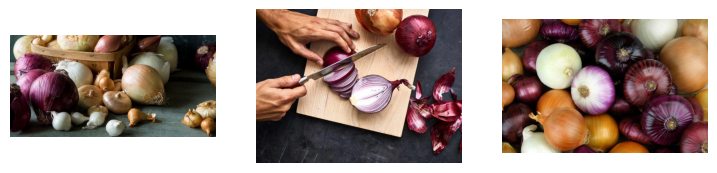

Processed images for category: onion


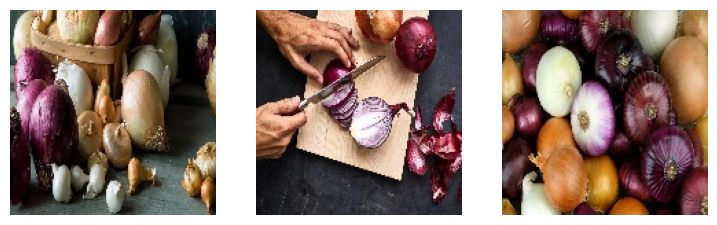

Original images for category: peas


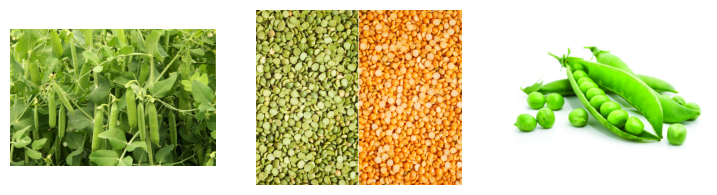

Processed images for category: peas


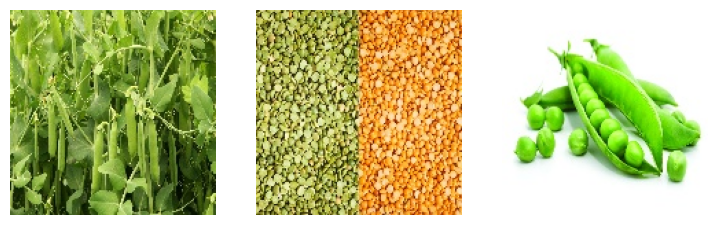

Original images for category: broccoli


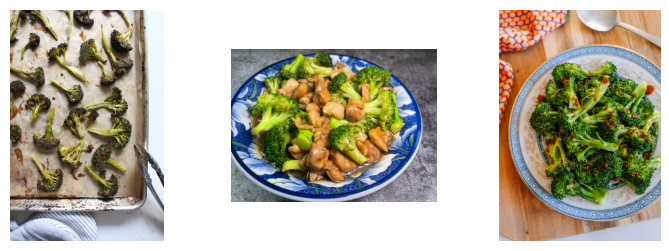

Processed images for category: broccoli


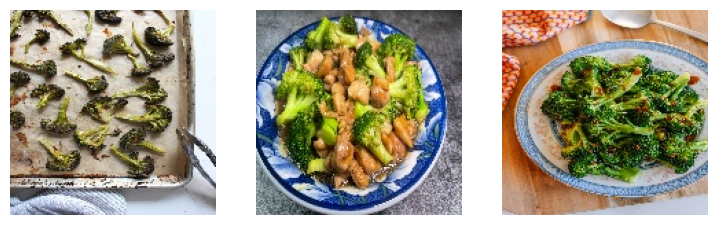

Original images for category: carrot


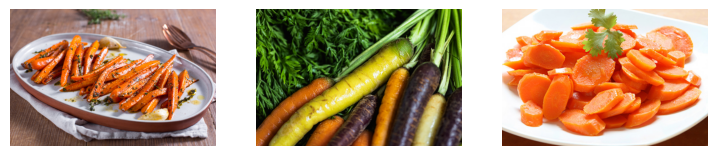

Processed images for category: carrot


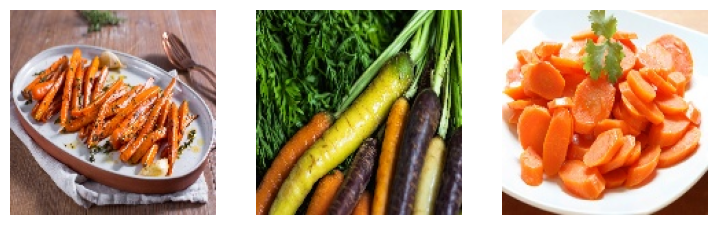

In [ ]:
def show_sample_images(input_dir, processed_dir, num_samples=3):
    categories = os.listdir(input_dir)

    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)

        # Show original images
        print(f"Original images for category: {category}")
        fig, axes = plt.subplots(1, num_samples, figsize=(9, 3))
        for i in range(num_samples):
            img_path = os.path.join(category_path, images[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()

        # Show processed images
        processed_category_path = os.path.join(processed_dir, category)
        processed_images = os.listdir(processed_category_path)

        print(f"Processed images for category: {category}")
        fig, axes = plt.subplots(1, num_samples, figsize=(9,3))

        for i in range(num_samples):
            img_path = os.path.join(processed_category_path, processed_images[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB for display
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()

show_sample_images(raw_dir,processed_dir, 3)


# Split the data

In [ ]:
import os
import shutil
import random

def split_dataset(input_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Create output directories for train, validation, and test sets
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'validation')
    test_dir = os.path.join(output_dir, 'test')
    for dir_path in [train_dir, val_dir, test_dir]:
        os.makedirs(dir_path)

    # Iterate through each folder (each vegetable category)
    for category in os.listdir(input_dir):
        category_path = os.path.join(input_dir, category)
        
        # Get list of images for the category
        images = os.listdir(category_path)
        random.shuffle(images)  # Shuffle the images
        
        # Calculate number of images for each set
        num_train = int(len(images) * train_ratio)
        num_val = int(len(images) * val_ratio)
        num_test = len(images) - num_train - num_val
        
        # Split images into train, validation, and test sets
        train_images = images[:num_train]
        val_images = images[num_train:num_train + num_val]
        test_images = images[num_train + num_val:]
        
        # Copy images to respective directories
        for img in train_images:
            src = os.path.join(category_path, img)
            dest = os.path.join(train_dir, category)
            shutil.copy(src, dest)
        
        for img in val_images:
            src = os.path.join(category_path, img)
            dest = os.path.join(val_dir, category)
            shutil.copy(src, dest)
        
        for img in test_images:
            src = os.path.join(category_path, img)
            dest = os.path.join(test_dir, category)
            shutil.copy(src, dest)